In [83]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from sklearn.impute import SimpleImputer
import io 

In [84]:
df = pd.read_excel(r'C:\Github\Fullstack-Data-Analyst\data_projects\Hrsa_Awards\current_hrsa_award.xlsx')

In [85]:
df.columns = df.columns.str.replace(' ', '')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61306 entries, 0 to 61305
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   AwardYear                                               61306 non-null  int64         
 1   FinancialAssistance                                     61306 non-null  float64       
 2   GranteeAddress                                          61306 non-null  object        
 3   GranteeCity                                             61306 non-null  object        
 4   GranteeCountyDescription                                61306 non-null  object        
 5   GranteeCountyName                                       61306 non-null  object        
 6   GranteeName                                             61306 non-null  object        
 7   GranteeRegionCode                                       61

In [87]:
df['City&State'] = df['GranteeCity'] + ',' + df['GranteeStateAbbreviation']

In [88]:
city = df['City&State']
df = df.drop(columns=['City&State'])
df.insert(loc=3, column='City&State', value=city)

In [89]:
df['GranteeZIPCode'] = df['GranteeZIPCode'].astype(str).str.pad(5, side='left', fillchar='0')

In [90]:
df['GranteeZIPCode'] = df['GranteeZIPCode'].str.replace('00nan', '00000')

In [91]:
df[['ZipCode', 'ZipCodeExt']] = df.GranteeZIPCode.str.split(pat='-', n=1, expand=True)

In [92]:
df.drop(columns=['ZipCodeExt', 'GranteeZIPCode'], inplace=True)

In [93]:
df.rename(columns={'ZipCode': 'GranteeZipCode'}, inplace=True)

In [94]:
zip = df['GranteeZipCode']
df =df.drop(columns=['GranteeZipCode'])
df.insert(loc=4, column='GranteeZipCode', value=zip)

In [95]:
mis_col = df.isna().sum() * 100 / len(df)
mis_col.sort_values(ascending=False)

CCN                                                       62.210877
UniformDataSystemGrantProgramDescription                  31.502626
GrantProgramDirectorPhoneNumber                           29.458781
NameofU.S.SenatorNumberTwo                                 0.389848
NameofU.S.SenatorNumberOne                                 0.389848
UniqueEntityIdentifier                                     0.203895
U.S.CongressionalRepresentativeName                        0.182690
GeocodingArtifactAddressPrimaryYCoordinate                 0.039148
GeocodingArtifactAddressPrimaryXCoordinate                 0.039148
City&State                                                 0.029361
GranteeRegionCode                                          0.029361
GranteeStateAbbreviation                                   0.029361
DUNSNumber                                                 0.027730
GrantProgramDirectorE-mail                                 0.013049
Abstract                                        

In [96]:
df.drop(columns=['CCN', 'UniformDataSystemGrantProgramDescription', 'GrantProgramDirectorPhoneNumber'], inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61306 entries, 0 to 61305
Data columns (total 44 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   AwardYear                                               61306 non-null  int64         
 1   FinancialAssistance                                     61306 non-null  float64       
 2   GranteeAddress                                          61306 non-null  object        
 3   City&State                                              61288 non-null  object        
 4   GranteeZipCode                                          61306 non-null  object        
 5   GranteeCity                                             61306 non-null  object        
 6   GranteeCountyDescription                                61306 non-null  object        
 7   GranteeCountyName                                       61

In [98]:
cat_df = df.select_dtypes(exclude=['float64', 'int64']).columns

In [99]:
cat_df

Index(['GranteeAddress', 'City&State', 'GranteeZipCode', 'GranteeCity',
       'GranteeCountyDescription', 'GranteeCountyName', 'GranteeName',
       'HRSARegion', 'GranteeStateAbbreviation', 'StateName',
       'GrantActivityCode', 'GrantNumber', 'ProjectPeriodStartDate',
       'ProjectPeriodStartDateTextString', 'GrantProjectPeriodEndDate',
       'GrantProjectPeriodEndDateText', 'HRSAProgramAreaCode',
       'HRSAProgramAreaName', 'CompleteCountyName',
       'GrantProgramDirectorE-mail', 'GrantProgramDirectorName',
       'GrantProgramName', 'CongressionalDistrictName',
       'CongressionalDistrictNumber', 'HHSRegionNumber',
       'U.S.CongressionalRepresentativeName',
       'StateandCountyFederalInformationProcessingStandardCode',
       'StateFIPSCode', 'U.S.-MexicoBorder100KilometerIndicator',
       'U.S.-MexicoBorderCountyIndicator', 'NameofU.S.SenatorNumberOne',
       'NameofU.S.SenatorNumberTwo', 'Abstract', 'GranteeTypeDescription',
       'UniqueEntityIdentifier', 'Da

In [100]:
df = df.astype({'ProjectPeriodStartDate': 'datetime64[ns]', 'ProjectPeriodStartDateTextString': 'datetime64[ns]', 'GrantProjectPeriodEndDate': 'datetime64[ns]', 'GrantProjectPeriodEndDateText': 'datetime64[ns]', 'DataWarehouseRecordCreateDate': 'datetime64[ns]', 'DataWarehouseRecordCreateDateText' :'datetime64[ns]'})

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61306 entries, 0 to 61305
Data columns (total 44 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   AwardYear                                               61306 non-null  int64         
 1   FinancialAssistance                                     61306 non-null  float64       
 2   GranteeAddress                                          61306 non-null  object        
 3   City&State                                              61288 non-null  object        
 4   GranteeZipCode                                          61306 non-null  object        
 5   GranteeCity                                             61306 non-null  object        
 6   GranteeCountyDescription                                61306 non-null  object        
 7   GranteeCountyName                                       61

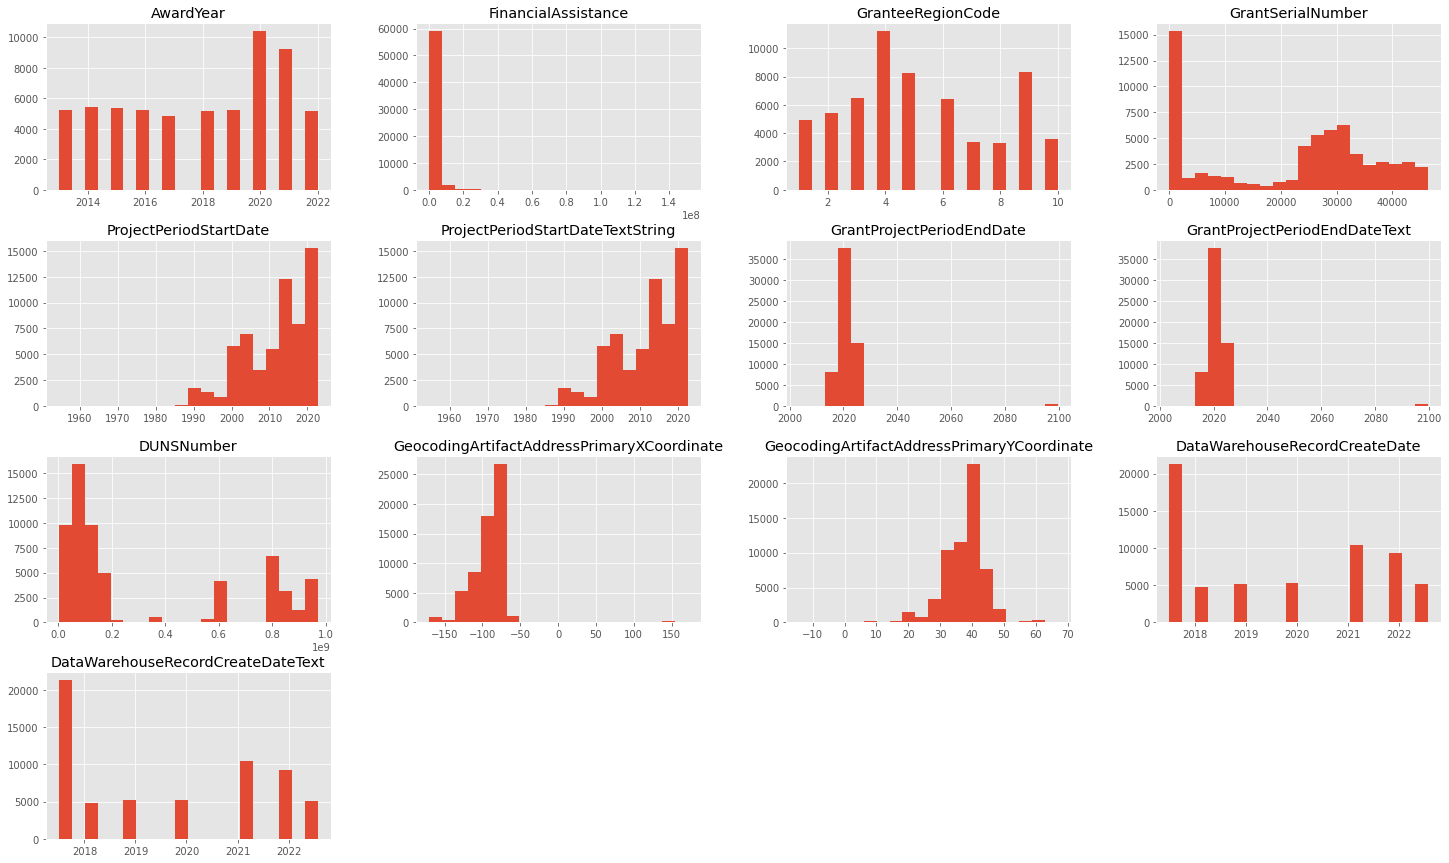

In [102]:
hist_dist = df.hist(bins=20, figsize=(25,15))

Correlation between states and financial assistance

In [103]:
import sklearn

from sklearn.preprocessing import LabelEncoder  ##Switches cat data to numerical
from sklearn.preprocessing import StandardScaler  ## standadizes data

In [104]:
le=LabelEncoder()
#le.fit(df.column_name.drop_duplicates())
df ['StateName_N']= le.fit_transform(df['StateName'])

In [105]:
df.corr()

,AwardYear,FinancialAssistance,GranteeRegionCode,GrantSerialNumber,DUNSNumber,GeocodingArtifactAddressPrimaryXCoordinate,GeocodingArtifactAddressPrimaryYCoordinate,StateName_N
AwardYear,1.000000,0.020169,0.019897,0.354445,-0.016954,-0.021146,-0.010777,-0.010919
FinancialAssistance,0.020169,1.000000,0.001238,-0.179480,0.016726,-0.017033,-0.023537,-0.019588
GranteeRegionCode,0.019897,0.001238,1.000000,0.008712,0.068147,-0.543838,-0.001173,-0.250182
GrantSerialNumber,0.354445,-0.179480,0.008712,1.000000,-0.027116,0.001531,-0.001466,-0.020487
DUNSNumber,-0.016954,0.016726,0.068147,-0.027116,1.000000,0.047289,-0.096284,0.024328
GeocodingArtifactAddressPrimaryXCoordinate,-0.021146,-0.017033,-0.543838,0.001531,0.047289,1.000000,-0.249058,0.188123
GeocodingArtifactAddressPrimaryYCoordinate,-0.010777,-0.023537,-0.001173,-0.001466,-0.096284,-0.249058,1.000000,0.101294
StateName_N,-0.010919,-0.019588,-0.250182,-0.020487,0.024328,0.188123,0.101294,1.000000


In [106]:
df['StateName_N'].corr(df['FinancialAssistance'])

-0.01958785720846628

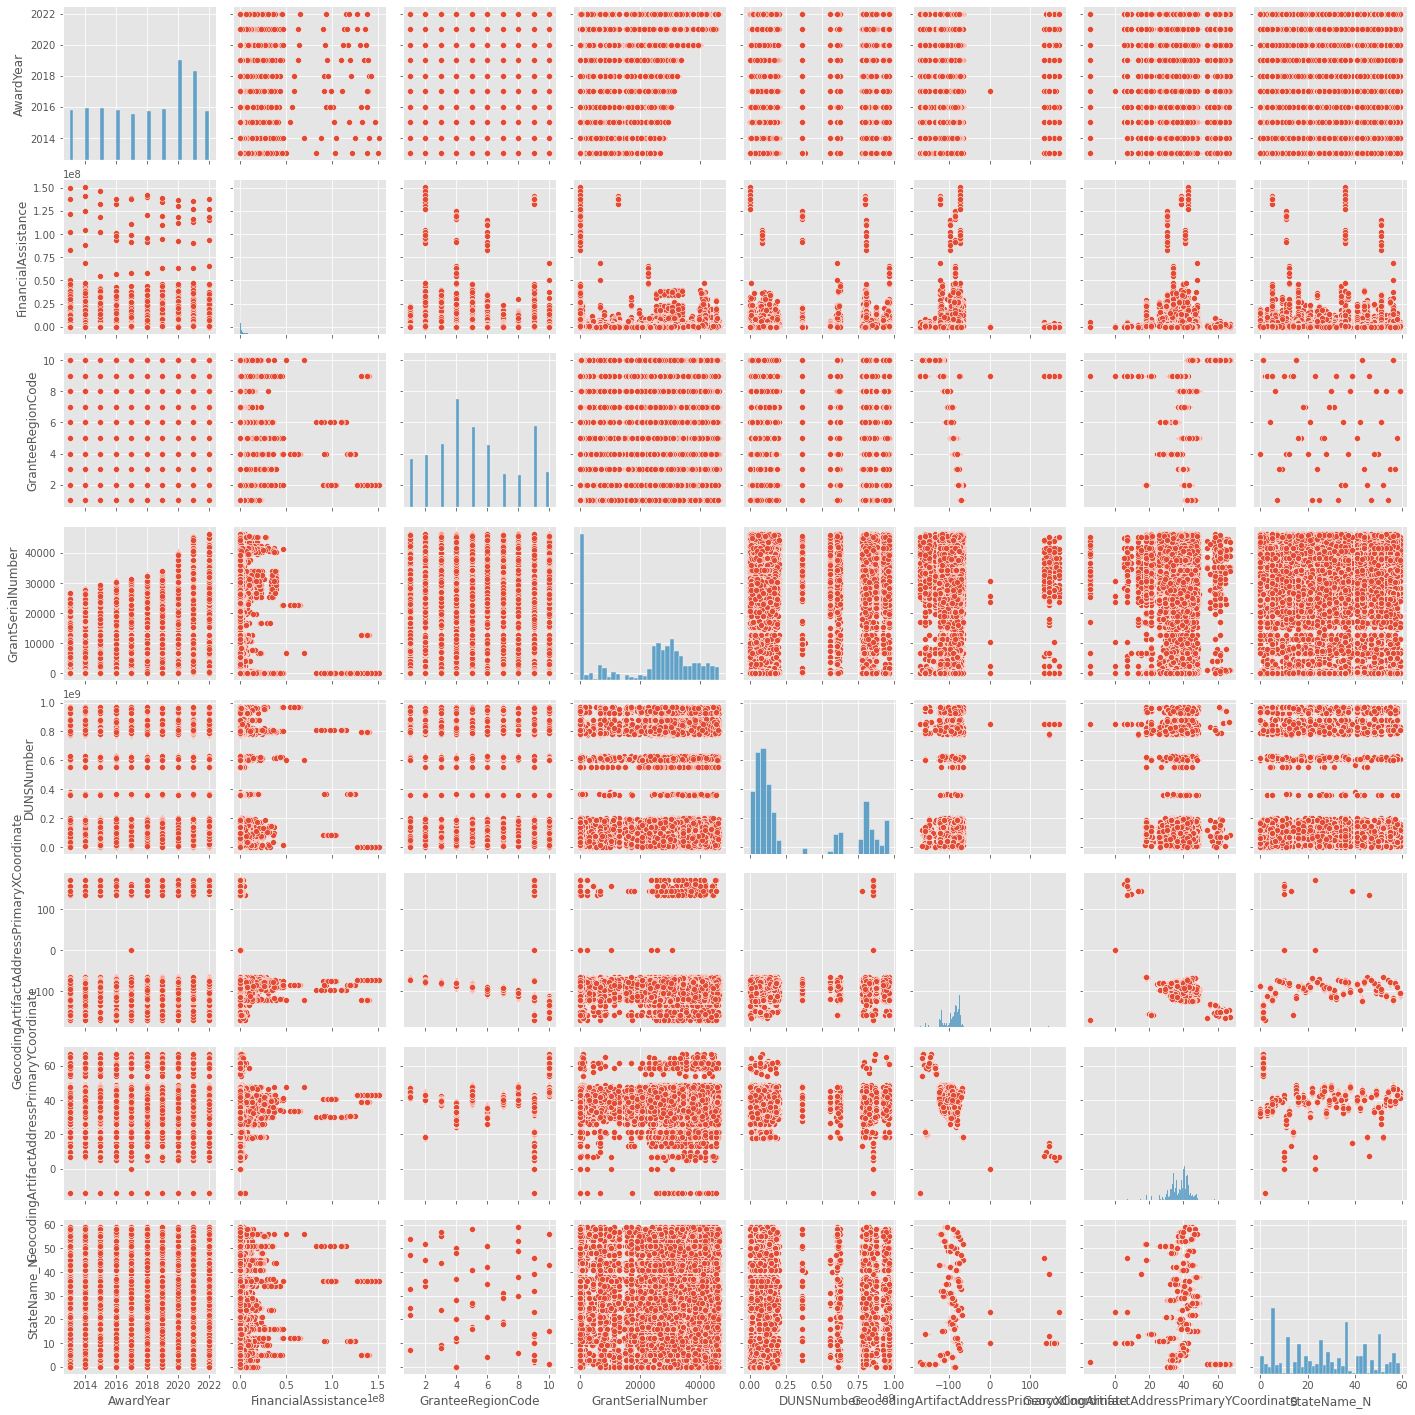

In [107]:
sns.pairplot(data=df, palette='dark')

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


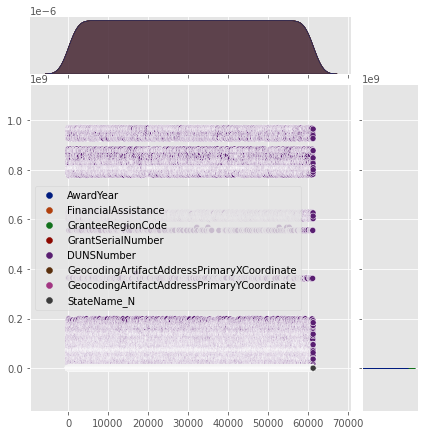

In [108]:
sns.jointplot(data=df, palette='dark')

In [109]:
df.describe()

,AwardYear,FinancialAssistance,GranteeRegionCode,GrantSerialNumber,DUNSNumber,GeocodingArtifactAddressPrimaryXCoordinate,GeocodingArtifactAddressPrimaryYCoordinate,StateName_N
count,61306.000000,6.130600e+04,61288.000000,61306.000000,6.128900e+04,61282.000000,61282.000000,61306.000000
mean,2017.920008,1.654468e+06,5.233488,21625.613561,3.225868e+08,-90.628363,37.788925,28.028627
std,2.866390,4.568643e+06,2.659130,15196.707605,3.436217e+08,26.862757,6.765727,17.224113
min,2013.000000,2.300000e-01,1.000000,1.000000,1.371298e+06,-170.747000,-14.319000,0.000000
25%,2015.000000,2.382368e+05,3.000000,2319.000000,7.129881e+07,-101.409513,34.058957,12.000000
50%,2018.000000,5.538900e+05,5.000000,26566.000000,1.224812e+08,-86.805478,38.935839,27.000000
75%,2020.000000,1.518592e+06,7.000000,32738.000000,7.800767e+08,-78.235572,41.722577,43.000000
max,2022.000000,1.507701e+08,10.000000,46354.000000,9.699872e+08,171.380270,66.903442,59.000000


c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GranteeRegionCode'>

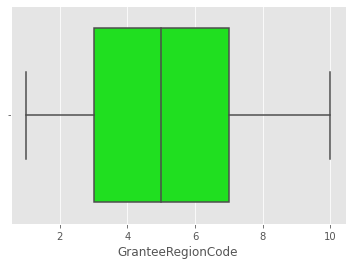

In [110]:
sns.boxplot(df['GranteeRegionCode'], color='lime')

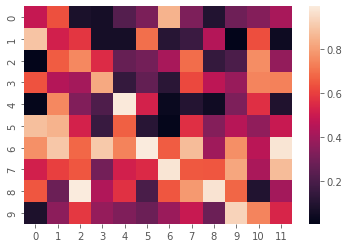

In [111]:
heat_df = np.random.rand(10,12)
va = sns.heatmap(heat_df)

<AxesSubplot:>

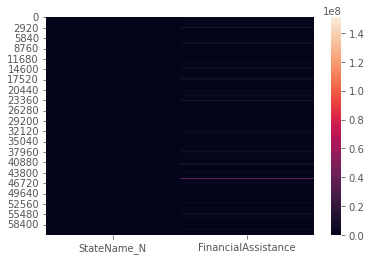

In [112]:
sns.heatmap(df[['StateName_N', 'FinancialAssistance']])

Heatmap

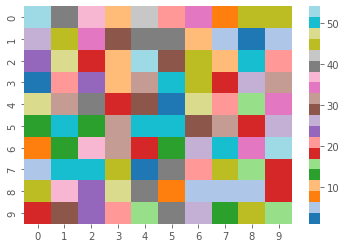

In [113]:
df = np.random.randint(low=1, high=55, size=(10,10))
cmap = 'tab20'
hm = sns.heatmap(data=df, cmap=cmap)
plt.show()

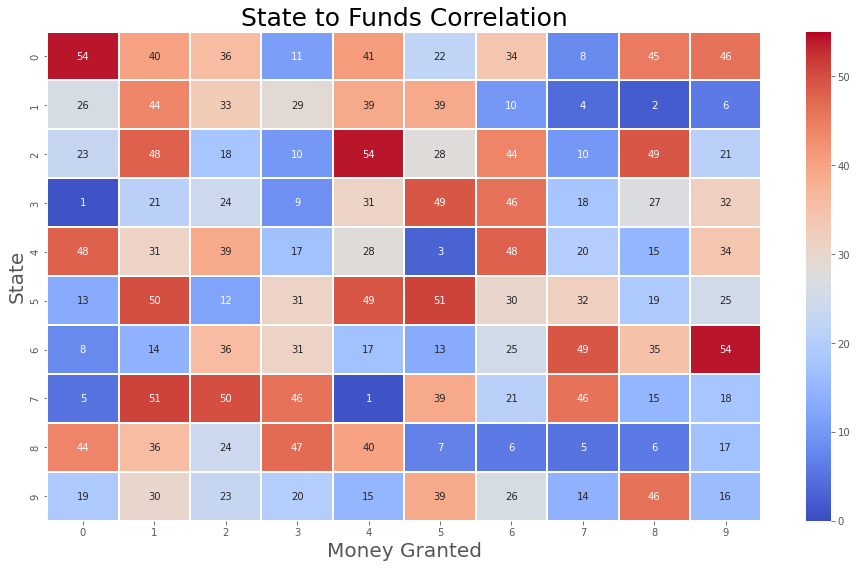

In [114]:
plt.figure(figsize=(16,9))


sns.heatmap(df, vmin = 0, vmax=55, cmap='coolwarm', annot=True, linewidth=2, cbar=True)
plt.title('State to Funds Correlation', fontsize = 25)
plt.xlabel('Money Granted', fontsize=20)
plt.ylabel('State', fontsize=20)
plt.show()

In [115]:
# new_df = df